# Travaux Pratiques Intelligence Artificielle: Lab2

Neural Networks avec Pytorch 🤖 🙌.

## Objectifs du TP:

> **Se Familiariser avec Pytorch** 

> **Comprendre le processus d'apprentissage d'un réseau de neurones**

> **Créer un réseau de neurones (feed-forward multilayers NN) avec Pytorch**



<br></br>
_Besoin d'aide? Laisser moi un Commentaire sur Teams_

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## A. Introduction à Pytorch

<br> Pytorch est une librairie open source Python, developpée par AI Research lab (FAIR) de Facebook et publiée en ligne en Sept. 2016. Elle permet d'effectuer les calculs tensoriels nécessaires notamment pour l'apprentissage profond (deep learning).   

Pytorch permet une implémentation et un apprentissage facile des réseaux de neurones (NN). Elle est très proche de la syntaxe de Python, d'ailleurs il est même possible d'intégrer des blocs if else dans un code NN. Elle a une riche communauté et une documentation actualisée (comparée à tensorflow). D'autant plus qu'elle est très utilisée par les chercheurs, ce qui garantie l'implémentation des nouveaux modèles sur Pytorch.

Vous pouvez installer Pytorch à partir d'un terminal ou au niveau de ce jupyter en exécutant la cellule ci-dessous. 

**N.B.** Si vous avez des inconsistences au niveau de l'installation, pensez à créer un environnement spécifique pour ce TP.

<br>

<br> 

Afin de mener à bien les implémentations des NN, Pytorch fournit l'objet **Tensor**. Un tensor sur Pytorch a les mêmes fonctions et syntaxe qu'un numpy array mais est optimisé pour GPU. D'autant plus que son backend C++ permet à Pytorch d'être beaucoup plus performante et rapide que numpy. 
<br>

In [541]:
# Importer torch
import torch
print(torch.__version__)

1.7.0


In [542]:
# créer une matrice identité de taille 4x4
eye4 = torch.eye(4)
print(eye4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


In [543]:
# Créer un tensor avec des valeurs aléatoires d'une taille de votre choix
x = torch.rand(4,3)
print(x)

tensor([[0.6426, 0.5716, 0.3965],
        [0.9133, 0.8844, 0.7925],
        [0.6661, 0.8868, 0.0243],
        [0.2956, 0.6687, 0.5823]])


In [544]:
# Changer la forme de votre tensor 
x.view(3,4)

tensor([[0.6426, 0.5716, 0.3965, 0.9133],
        [0.8844, 0.7925, 0.6661, 0.8868],
        [0.0243, 0.2956, 0.6687, 0.5823]])

In [545]:
# Afficher la taille, la forme,
x.size()

torch.Size([4, 3])

In [546]:
# et le type des éléments de votre tensor
x.type()

'torch.FloatTensor'

In [547]:
xt = x.transpose(0, 1)

In [548]:
# Ajouter une constante fixe à l'ensemble des éléments du tensor
torch.add(x, 20)

tensor([[20.6426, 20.5716, 20.3965],
        [20.9133, 20.8844, 20.7925],
        [20.6661, 20.8868, 20.0243],
        [20.2956, 20.6687, 20.5823]])

In [549]:
# Multiplier votre tensor par sa transposé (multiplication matricielle, pas element-wise)
torch.mm(x,xt)

tensor([[0.8969, 1.4066, 0.9446, 0.8031],
        [1.4066, 2.2444, 1.4119, 1.3229],
        [0.9446, 1.4119, 1.2307, 0.8041],
        [0.8031, 1.3229, 0.8041, 0.8736]])

In [550]:
# Avec quelques exemples, montrer que la selection d'éléments des tensors se fait de la même manière que sur NumPy 
print(x[1][1], x[3][2])

tensor(0.8844) tensor(0.5823)


<br> 

Une fonctionnalité très utile de Pytorch, est la possibilité d'échanger les tensors facilement avec NumPy.  



In [551]:
# Importer numpy
import numpy as np

In [552]:
# Créer une matrice numpy avec des valeurs aléatoires
a = np.random.rand(3,2)
a

array([[0.22566503, 0.0077546 ],
       [0.47035519, 0.43104928],
       [0.7979381 , 0.4146357 ]])

In [553]:
# Créer un tensor Pytorch à base de cette matrice np
b = torch.from_numpy(a)
b

tensor([[0.2257, 0.0078],
        [0.4704, 0.4310],
        [0.7979, 0.4146]], dtype=torch.float64)

In [554]:
# Convertir à nouveau ce tensor en un numpy array
c = b.numpy()
c

array([[0.22566503, 0.0077546 ],
       [0.47035519, 0.43104928],
       [0.7979381 , 0.4146357 ]])

<br> Pytorch, comme numpy, offre une fonctionnalité qu'on appelle **broadcasting**. Elle permet d'exécuter des opérations entre des tensors (resp. arrays) qui n'ont pas la même forme, comme l'illustre la figure suivante:

<img src="resources/broadcasting.png" >

Pytorch assouplie la contrainte de forme mais ne la supprime pas totalement. Il est primordiale d'obéir les règles pour effectuer des oprérations entre deux tensors Pytorch:
1. Deux tensors de même rang sont compatibles (broadcastable) si, pour chaque axe, soit les tailles sont égales, soit l’une d’elles est exactement égale à 1. P.ex. (5, 3) et (1, 3) sont des formats broadcastable, (5, 3) et (5, 1) également, mais (5, 3) et (3, 1) ne le sont pas.
2. Si un tensor a un axe de taille 1, le tensor sera dupliqué à la volée autant de fois que nécessaire selon cet axe pour atteindre la taille de l’autre tensor le long de cet axe. P.ex. un tensor (2, 1, 3) pourra être transformé en tensor (2, 5, 3) en le dupliquant 5 fois le long du 2e axe (axis=1).
3. La taille selon chaque axe après broadcast est égale au maximum de toutes les tailles d’entrée le long de cet axe. P.ex. (5, 3, 1) × (1, 3, 4) → (5, 3, 4).
4. Si un des tensors a un rang (ndim) inférieur à l’autre, alors sa forme (shape) est précédée d’autant de 1 que nécessaire pour atteindre le même rang. P.ex. (5, 3, 1) × (4,) = (5, 3, 1) × (1, 1, 4) → (5, 3, 4).

Pour plus d'informations sur le broadcasting, vous pouvez aller sur le lien: http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc

In [555]:
# Illustrer le broadcasting par un exemple
x = torch.rand(4,3)
y = torch.rand(4,1)
z = x + y
print(x)
print(y)
print(z)

tensor([[0.8108, 0.7675, 0.0966],
        [0.2814, 0.9338, 0.5881],
        [0.7884, 0.1962, 0.0430],
        [0.1867, 0.1275, 0.3935]])
tensor([[0.6495],
        [0.1556],
        [0.4109],
        [0.3547]])
tensor([[1.4603, 1.4170, 0.7461],
        [0.4370, 1.0894, 0.7437],
        [1.1992, 0.6070, 0.4538],
        [0.5413, 0.4821, 0.7482]])


<br> L'unes des fonctionnalités les plus prisée de Pytorch est qu'il permet de calculer d'une manière très facile les gradients des tensors, ce qui est très utile pour appliquer les algorithmes d'optimisation par descente de gradient. Pour cela, PyTorch utilise la bibliothèque autograd qui permet de garder une trace de l'orgine des tensors (leurs tensors parents, les opérations effectuées) et fournir automatiquement la chaîne des dérivées de ces opérations en fonction de leur input. Pytorch fournit donc le gradient d'une expression en fonction de ses paramètres en input automatiquement. 

In [556]:
# Créer un tensor x dont la fonctionalité de gradient est activée
x = torch.tensor([[1., -1., 1., 1.],[1., -1., 1., 1.]] )
x.requires_grad_(True)

tensor([[ 1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.]], requires_grad=True)

In [557]:
# Créer un nouveau tensor y, résultat d'une opération linéaire sur le tensor x. L'attribut grad_fn trace l'opération effectuée 
y = x * 0.5
print(y)
print(y.grad_fn)

tensor([[ 0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.5000, -0.5000,  0.5000,  0.5000]], grad_fn=<MulBackward0>)


In [558]:
# Créer un tensor w qui est la moyenne de y. Vous devrez voir la différence dans grad_fn
w = y.mean()
print(w)

tensor(0.2500, grad_fn=<MeanBackward0>)


In [559]:
# faire un backpropagation sur votre tensor w -> ce qui revient à automatiquement calculer dw/dx
w.backward()

In [560]:
# Afficher le gradient de x
print(x.grad)

tensor([[0.0625, 0.0625, 0.0625, 0.0625],
        [0.0625, 0.0625, 0.0625, 0.0625]])


In [561]:
# Effectuer une opération sur x qui n'est pas tracé dans le gradient  
with torch.no_grad():
    z = x * 2
    print(z)
    print(z.grad_fn)

tensor([[ 2., -2.,  2.,  2.],
        [ 2., -2.,  2.,  2.]])
None


In [562]:
# Afficher le gradient de x (devrait rester le même)
print (x.grad)

tensor([[0.0625, 0.0625, 0.0625, 0.0625],
        [0.0625, 0.0625, 0.0625, 0.0625]])


<br> Pytorch offre également la possibilité d'effectuer les opérations des tensors sur CPU ou GPU. 

In [563]:
# Vérifier que vous avez la capacité d'exécuter sur GPU sur votre machine
dev = torch.device("gpu" if torch.cuda.is_available() else "cpu")
dev

device(type='cpu')

In [564]:
# Si vous avez GPU, vous pouvez déplacer les calculs qu'on vient de faire sur GPU
#dommage j'ai pas du GPU

<br> Vous pouvez explorer d'autres opérations torch peuvent être explorées ici: https://pytorch.org/docs/stable/torch.html

## B. Notre premier NN

![image](resources/learning.png)

Source: Deep Learning with Pytorch

<br> Dans notre TP, nous allons implémenter un feed forward NN qui identifie les chiffres écrits à la main (Hello World! des NN). La difficulté revient à identifier le même chiffre même s'il est écrit d'une manière très différente. 

Notre NN devra prendre en input une image (28 x 28 pixels) et identifier le chiffre en output. Le Dataset utilisé, __MNIST__, englobe 60.000 échantillions de chiffres écrits à la main par 250 personnes pour l'apprentissage, et 10.000 pour le test écrits par un autre groupe de 250 personnes. Les échantillons ont été rassemblés et mergés par NIST (United States' National Institute of Standards and Technology), d'où le nom du dataset. 

Pour ce faire, nous allons créer un réseau de neurones qui permet de **classfier** une image selon un **output label**. 

- Combien de Labels faudrait-il prévoir en output?

10 (output)
28*28 (input)

Les étapes pour la création de notre NN sont les suivants:

1. Lire et préparer les données 

2. Créer le réseau de neuronne

3. Entraîner le réseau de neuronne

4. Tester notre modèle

### 1. Lire et préparer les données

Avant d'implémenter tout modèle, il faut commencer par **Examiner et comprendre les données** puis les **formatter** convenablement pour alimenter le NN. L'objectif de cette partie est d'abord d'explorer le dataset MNIST, puis de préparer les datasets input du NN.


1.   Importer le MNIST dataset
2.   Afficher les images avec leurs labels
3.   Préparer les données: split train, test, validation et normalisation des données
4.   Créer un Pytorch Dataset

<br>

#### 1.1.   Importer le MNIST dataset

In [565]:
# importer la librairie torch et le module datasets de torchvision
from torchvision import datasets

<br> Le projet torchvision contient les meilleures architectures NN pour computer vision, ainsi que des datasets standards et utilitaires pour implémenter les projest computer vision. La liste des datasets du projet peut être explorée ici: https://pytorch.org/docs/stable/torchvision/datasets.html

Le dataset MNIST contient un sous dataset pour le training et un pour le test. Récupérer ces deux sous-dataset en deux objets dataset https://pytorch.org/docs/stable/torchvision/datasets.html#mnist

N.B. Ne pas oublier de donner des noms significatifs à vos variables.
<br>

In [566]:
# Récupérer les données d'apprentissage
downloaded_train = datasets.MNIST(root='./resources', train=True, download=True)

In [567]:
# Récupérer les données de test
downloaded_test = datasets.MNIST(root='./resources', train=False, download=True)

<br> Essayons d'explorer les données dans nos datasets. MNIST devrait contenir des images de chiffres écrits à la main. Une image est représenté comme un Tensor Pytorch.

In [568]:
# Afficher un datapoint de votre dataset d'apprentissage, sa forme, le type des données, les valeurs min et max. 
# Que représente les valeurs du Tensor à votre avis?
print(downloaded_train)
print(downloaded_test)
print(downloaded_train.data[10].shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./resources
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./resources
    Split: Test
torch.Size([28, 28])


In [569]:
torch.min(downloaded_train.data)

tensor(0, dtype=torch.uint8)

In [570]:
torch.max(data_train.data)

tensor(255, dtype=torch.uint8)

In [571]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

<br></br>
#### 1.2.  Afficher les images avec leurs labels

Nous utiliserons imshow de matplotlib pour afficher un échantillon des données. Pensez à également afficher le label correspondant à chaque image en utilisant l'attribut targets votre objet MNIST dataset. 

In [572]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

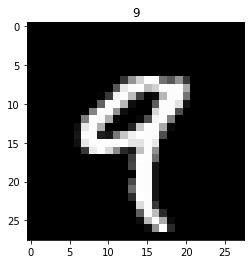

In [573]:
# Afficher un échantillon des images du dataset d'apprentissage avec leurs labels respectifs 

plt.imshow(downloaded_train.data[4], cmap="gray")
plt.title(downloaded_train.targets[4].item())

<br></br>
#### 1.3.  Préparer les données


**Créer un dataset de validation**

Notre dataset contient les données d'apprentissage et de test, nous aurons également besoin d'un dataset de validation. Pour ce faire, nous allons diviser notre dataset d'apprentissage de manière à dédier **10.000** data point à la validation. 

Nous utiliserons la librairie scikit learn qui contient une fonction permettant de diviser les données d'une manière très efficace. Pour plus de détails, voir: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [574]:
# Importer la fonction de splitting des données de scikit learn
from sklearn.model_selection import train_test_split

In [575]:
# Créer 4 tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
train_data, validation_data, train_targets, validation_targets = train_test_split(downloaded_train.data, downloaded_train.targets, test_size=10000)

In [576]:
# Récupérer les labels de test à partir de votre sous-dataset de test
test_data = downloaded_test.data
test_targets = downloaded_test.targets

<br> Vous devez maintenant avoir 6 tensors, un pour les données et l'autre pour les labels et ce pour l'apprentissage, le test, et la validation. 

In [577]:
# Afficher la taille de chaque tensor
print(train_data.shape, train_targets.shape)
print(validation_data.shape, validation_targets.shape)
print(test_targets.shape)


torch.Size([50000, 28, 28]) torch.Size([50000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([10000])


<br></br>
**Normaliser les données**

Il est souvent recommandé de normaliser les données avant d'alimenter le NN pour améliorer sa performance. On peut facilement redimensionner à l'intervalle [0,1] les valeurs de nos données en utilisant la moyenne et la déviation standard suivant cette formule: $$(Data - Mean) / standard Deviation$$

Comme "thumb rule", on normalise les données de test et de validation en utilisant la moyenne et la déviation des données d'apprentissage. Le raisonnement étant que les données test et validation sont indisponibles au moment de la création du NN.   

Après normalisation, le mean devrait être 0 et standard deviation à 1 (ou très proche resp. de 0 et 1).

N.B. Il faudra convertir les valeurs de vos tensors en float. 

In [578]:
# Convertir les valeurs des tensors en float
train_data = train_data.float()
test_data = test_data.float()
validation_data = validation_data.float()


In [579]:
# Stocker dans des variables la moyenne et la déviation standard des données d'apprentissage 
mean_train = torch.mean(train_data)
std_train = torch.std(train_data)

In [580]:
# Normaliser les données d'apprentissage, de test, et de validation par ces valeurs
train_data = (train_data - mean_train)/std_train
test_data = (test_data - mean_train)/std_train
validation_data = (validation_data - mean_train)/std_train



In [581]:
# Afficher la moyenne et la déviation standard de chaque dataset
print(train_data.mean(), train_data.std())
print(test_data.mean(),test_data.std())
print(validation_data.mean(), validation_data.std())




tensor(-4.2693e-09) tensor(1.0000)
tensor(0.0065) tensor(1.0083)
tensor(0.0029) tensor(1.0033)


<br></br>
#### 1.4. Création de Pytorch Dataset

Notre Pipeline devrait commencer par le chargement des données dans le NN. Pytorch fournit un ensemble d'outils facilitant et optimisant cette tâche. La classe **Dataset** permet de créer, sur la base de nos données, un dataset personalisé qui pourra être utilisé par la suite par la fonction built-in **DataLoader** afin d'alimenter les données lors de l'entraînement du NN. Dataset fournit un accès uniforme à nos données. DataLoader joue le rôle d'un data feeder en créant les batches de données qui fournissent au réseau de neuronne un échantillon de donnée à chaque itération.

Documentation classe Dataset: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

Afin de créer notre Pytorch Dataset personalisé, nous allons hériter de la classe Dataset et redéfinir les fonctions suivantes:
*   \_\_init__(self, data, targets): constructeur qui assignera les valeurs des attributs data et targets à l'objet une fois instancié
*   \_\_getitem__(self, idx) : permet de récupérer l'item à l'index idx. Utile pour éviter de charger la totalité du Dataset en mémoire (s'il est volumineux, on précise le chemin dans  \_\_init__), 
*   \_\_len__(self) : retroune la longeur de notre vecteur target

In [582]:
# Importer Dataset de torch.utils.data
from torch.utils.data import Dataset

In [583]:
# Créer une classe qui hérite de Dataset et redéfinit les méthodes comme susmentionné
class MyDataset(Dataset):
    def __init__(self, data, targets):
        super(MyDataset, self)
        self.data = data
        self.targets = targets
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)
    
        


<br> Nous allons instancier 3 objets (à partir de votre classe personnalisée) pour les données et targets de l'apprentissage, test et validation.

In [584]:
# Créer les 3 objets en instantiant votre classe
train_dataset = MyDataset(train_data, train_targets)
test_dataset = MyDataset(test_data, test_targets)
validation_dataset = MyDataset(validation_data, validation_targets)



In [585]:
# Importer DataLoader de torch.utils.data
from torch.utils.data import DataLoader

<br> DataLoader aide pour l'échantillonage et l'organisation de nos données en mini-batches. A chaque itération d'apprentissage (epoch), le DataLoader fait un shuffling des données avant de les passer au NN. DataLoader prend le dataset et la taille du batch comme argument. On mettra pour l'instant une taille de 64.   

In [586]:
# Créer une variable pour la taille du batch
batch_size = 64

In [587]:
# Créer les objets DataLoader pour vos datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

train_DL = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_DL = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
validation_DL = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


In [588]:
# Quelle est la taille de vos objets dataLoader? Comment expliquer ces résultats?
len(train_DL) #50000/64 nbres des batches

782

<br></br>
### 2. Créer le réseau de neurones

Pytorch fournit le module nn qui comprend les classes représentant les briques de base pour construire un réseau de neurones. Il y a maintes manières de créer un NN sur Pytorch, nous allons explorer quelques unes.

In [589]:
# Importer le module nn
import torch.nn as nn

<br> Pytorch permet de concaténer des classes de notre choix pour la création de notre NN, et ce grâce à nn.Sequential(). Cette méthode prend les données en input, et se charge de faire passer les outputs intermédiaires aux modules suivants, puis produit l'output du dernier module.

Pour notre NN, nous allons créer une architecture composée de:

1. Input Layer: Nos images ont une taille 28 x 28. On va essayer de réduire la taille en 64
2. Fonction d'activation: ReLu
3. Hidden Layer: applique une transformation linéaire sur les données en input, et réduit leur dimension en 32
4. Fonction d'activation: ReLu
5. Output Layer: applique une transformation linéaire sur les données en input, et réduit leur dimension en 10 (Nombre de classes)

Le choix que nous venons de faire des nombres des neurones dans hidden Layer est aléatoire. 

In [590]:
# En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
layers = []
layers.append(nn.Linear(784, 64))
layers.append(nn.ReLU())
layers.append(nn.Linear(64, 32))
layers.append(nn.ReLU())
layers.append(nn.Linear(32, 10))

net = nn.Sequential(*layers)


In [591]:
# Afficher le nombre de paramètres qui seront entraînés par le NN créé. Pourquoi ce chiffre?
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
pytorch_total_params

52650

<br> Sequential est une fonction standard de Pytorch. Elle n'offre pas assez de marge de personalisation. C'est pour autant qu'on a tendance à créer nos propres classe de réseaux de neurones, en héritant de la classe nn.Module et en redéfinissant ses méthodes.

La création de notre Classe réseau de neurones se fera en héritant de nn.Module et en redéfinissant:
1. La méthode \_\_init__ où on initialise les couches à utiliser (on suivra la même architecture que le premier NN)
2. La méthode forward où on spécifie les connexions entre les couches. Cela permet de préciser les opérations qu'on appliquera sur les données à chaque passe (et leur passage de l'input, hidden, à l'output layer).


Dans la fonction forward, on utilisera le module **torch.nn.Functional** qui contient un ensemble de fonctions utiles comme les fonctions d'activation... Vous pouvez voir un exemple de définition d'un NN personalisé sur la documentation de pytorch: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html

In [592]:
# Importer torch.nn.functional
import torch.nn.functional as F

In [593]:
# Créer une classe qui hérite de nn.Module et redéfinir le constructeur ainsi que la méthode forward
class Net (nn.Module):
    def __init__ (self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)     


In [594]:
# Instancier votre NN
net = Net()

In [595]:
# Vérifier que vous avez le même nombre de paramètres que le premier NN
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
pytorch_total_params


52650

<br></br>
### 3. Entraîner le réseau de neuronne

Maintenant que nous avons notre réseau de neurones, on devra commencer à l'entraîner. La boucle d'apprentissage est le processus qui permettra à notre réseau de neurones d'apprendre à partir des données input et d'ajuster les poids du NN selon les résultats de la fonction Loss. Pour implémenter notre boucle d'apprentissage sur Pytorch, nous avons besoin de:

1. Préciser un nombre d'itération pour l'apprentissage (epochs)
2. Définir notre fonction coût
3. Choisir l'optimiseur qui permettra d'optimiser le coût

    
Notre boucle d'apprentissage se fera selon le nombre des epochs défini, et devra comporter: 
1. Une boucle sur les données d'entraînement via DataLoader (minibatch): Alimenter les données dans le NN, Calculer le coût, et faire la backpropagation. 
2. Une boucle sur les données de validation via DataLoader:  Alimenter les données dans le NN, Calculer le coût, calculer un score de précision du modèle (on va définir un score simple qui indique le nombre de prévisions correctes).

Une bonne pratique est d'afficher les valeurs de coût et de précision pour chaque epoch.

In [596]:
# Définir la fonction du coût. On peut choisir CrossEntropyLoss
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

In [597]:
# Définir une fonction d'optimisation des coût: Adam par exemple. On devra définir un learning rate. On choisira 0.001.
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [598]:
# Définir le nombre d'epochs. Commencer petit. 
ep = 4

In [599]:
# boucle d'apprentissage:
for epoch in range(ep):
    for data in train_DL:
        feature, label = data
        net.zero_grad()
        output = net(feature.view(-1, 28*28))
        loss = F.nll_loss(output, label)
        loss.backward()
        optimizer.step()
print(loss)

# boucle de validation:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_DL:
        feature, label = data
        output = net(feature.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == label[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
        
        

tensor(0.0176, grad_fn=<NllLossBackward>)
Accuracy:  0.961


<br></br>
### 4. Tester le modèle

<br> Tester notre modèle revient à calculer la précision de la même manière que nous avons fait tout à l'heure, mais sur les données test.

In [600]:
# boucle de test:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_DL:
        feature, label = data
        output = net(feature.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == label[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
        


Accuracy:  0.961


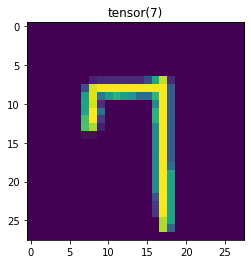

In [601]:
import matplotlib.pyplot as plt
plt.imshow(feature[0].view(28,28))
plt.title(torch.argmax(net(feature[0].view(-1, 28*28))))
plt.show()

BY BENDER & BENHIMA